## Objective 

1. Segment users based on their browsing activity.
2. Generate product catalog insights on category/subcategory level. 
3. Identify the major factors affecting users' buying decisions. 

### Events data attribute description 
* sid - session Id
* tt_id - user Id
* epoch - timestamp of the event
* log_url - URL of the page
* action_type - type of action ex. view, add to cart, place order etc.
* object type - type of object the action is performed on Ex. Product, collection etc.
* object id - changes based on the action type Ex. product Id, collection Id etc.
* utm parameters - utm_source, utm_campaign, utm_medium are tracking parameters extracted from the URL of the page.

 
Other metadata fields with location, user agent data are self-explanatory.
Please find the product catalog data attached. 

### Product catalog attribute description

* mfr_code - unique Id of the product
* avlble - 1 - product is in stock, 0 - product out of stock.

Other catalog fields contain the product details which are self-explanatory.

In [4]:
import pandas as pd
import seaborn as sns

### Loading the product catalogs as well as events data

In [5]:
product_data = pd.read_csv('/opt/luciapp/data/tanishq_products.csv')
product_data.head()

,_id,additional_image,adult,availability_date,avlble,brand,business_unit,category,collection,color,...,sale_price_usd,status,sub_account,subcategories,trendrank,unit,updated,url,variants,width
0,1.969160e+37,https://staticimg.titan.co.in/Tanishq/Catalog/...,No,NaN,0,Tanishq,Jewellery,NaN,NaN,NaN,...,61.42,Active,[tanishq],Jeweller,NaN,NaN,False,/product/tanishq-18kt-gold-and-diamond-stud-ea...,"{u'2JA000003': {u'price': 4431.0, u'listprice'...",NaN
1,9.450330e+37,https://staticimg.titan.co.in/Mia/Catalog/5528...,No,NaN,1,MIA,Jewellery,tq-mia-collections,Mia Birthstone Pendants,NaN,...,227.07,Active,"[tanishq, mia]",Jewellery,1.0,millimeters,False,/product/chain-pendant-552819gahaacz,"{u'2BD000278': {u'price': 16149.0, u'listprice...",NaN
2,6.910120e+37,https://staticimg.titan.co.in/Tanishq/Catalog/...,No,NaN,1,Tanishq,Jewellery,NaN,Contemporary,NaN,...,161.21,Active,[tanishq],Diamond,NaN,NaN,False,/product/tanishq-18kt-rose-gold-and-diamond-fi...,"{u'2JA005106': {u'price': 11493.0, u'listprice...",16.4 mm
3,1.111910e+38,https://staticimg.titan.co.in/Tanishq/Catalog/...,No,NaN,1,Tanishq,Jewellery,NaN,NaN,NaN,...,107.84,Active,[tanishq],Jeweller,30.0,NaN,False,/product/tanishq-18kt-gold-and-diamond-earring...,"{u'2BD005443': {u'price': 7688.0, u'listprice'...",NaN
4,2.911930e+38,https://staticimg.titan.co.in/Tanishq/Catalog/...,No,NaN,1,Tanishq,Jewellery,NaN,NaN,NaN,...,2813.45,Active,[tanishq],Jeweller,1.0,NaN,False,/product/22kt-gold-and-ruby-neckwear-in-a-flor...,"{u'2BA805635': {u'price': 200571.0, u'listpric...",NaN


In [11]:
event_data = pd.read_csv('/opt/luciapp/data/tanishq_products_full.csv', parse_dates=True)
event_data.head()

/opt/runtime-environments/nlp/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,action_type,user_type,epoch,object_id,user_id,sid,og_url,tt_id,sub_account,utm_source,utm_campaign,utm_medium,referrer,utm_content,latitude,longitude,useragent,variant_id
0,view,guest,2019-11-28 20:59:00.000,Buy Engagement Rings Online - Shop Diamond Eng...,NaN,0.693364,https://www.tanishq.co.in/shop/engagement-ring...,1574974426476,tanishq,NaN,NaN,NaN,NaN,NaN,26.9167,75.8167,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN
1,view,guest,2019-11-28 20:59:00.000,500064ONAABB09,NaN,0.472003,https://www.tanishq.co.in/product/tanishq-18kt...,1574973022537,tanishq,NaN,NaN,NaN,NaN,NaN,13.0843,80.2805,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,3IH000030
2,view,guest,2019-11-28 20:59:01.000,Buy Diamond Earrings Online in India | Shop La...,NaN,0.897467,https://www.tanishq.co.in/shop/diamond-earring...,1574974640117,tanishq,NaN,NaN,NaN,NaN,NaN,38.9841,-77.3672,Mozilla/5.0 (iPhone; CPU iPhone OS 13_1_3 like...,NaN
3,view,guest,2019-11-28 20:59:01.000,511250PGUAAA00,NaN,0.403961,https://www.tanishq.co.in/product/tanishq-22kt...,1564659331282,tanishq,NaN,Sok_Traffic_MultipleAds_Prospecting_Tanishq_No...,cpc,m.facebook.com,NaN,26.9167,75.8167,Mozilla/5.0 (Linux; Android 8.1.0; Redmi Note ...,2ED000494
4,view,guest,2019-11-28 20:59:01.000,502112FHHLAJ54,NaN,0.961382,https://www.tanishq.co.in/product/tanishq-18kt...,1574974721184,tanishq,NaN,NaN,NaN,NaN,NaN,32.1000,76.2667,Mozilla/5.0 (iPhone; CPU iPhone OS 13_1_2 like...,3IH000001


### Exploring the user segments based on their browsing history

In [11]:
event_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801810 entries, 0 to 801809
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   action_type   801810 non-null  object 
 1   user_type     801810 non-null  object 
 2   epoch         801810 non-null  object 
 3   object_id     801793 non-null  object 
 4   user_id       6299 non-null    object 
 5   sid           801810 non-null  float64
 6   og_url        801810 non-null  object 
 7   tt_id         801810 non-null  int64  
 8   sub_account   801810 non-null  object 
 9   utm_source    38674 non-null   object 
 10  utm_campaign  193171 non-null  object 
 11  utm_medium    193171 non-null  object 
 12  referrer      360085 non-null  object 
 13  utm_content   3970 non-null    object 
 14  latitude      801810 non-null  float64
 15  longitude     801810 non-null  float64
 16  useragent     801809 non-null  object 
 17  variant_id    327644 non-null  object 
dtypes: f

In [59]:
event_data['utm_medium'].value_counts()

cpc                 158462
retargeting          19219
web                  14466
CPC                   1001
Click to website         6
Banners                  5
email                    4
71432512313              1
71432512553              1
Mailer                   1
banner                   1
71432516593              1
71432518753              1
71432512513              1
post                     1
Name: utm_medium, dtype: int64

In [45]:
event_data['action_type'].value_counts()

view                    796899
add_to_cart               4045
remove_from_cart           395
add_to_wishlist            208
place_order                136
register                   110
remove_from_wishlist        17
Name: action_type, dtype: int64

In [7]:
event_data.groupby(['utm_source', 'user_type', 'utm_medium']).action_type.value_counts()

utm_source       user_type  utm_medium        action_type    
FBTanishq        email      cpc               view                  18
                                              add_to_wishlist        4
                                              add_to_cart            1
                 guest      cpc               view                3826
                                              add_to_cart          109
Facebook         guest      CPC               view                1001
GMB              guest      Click to website  view                   6
HockeyCurve      guest      Banners           view                   5
Netcore_1080_16  guest      Mailer            view                   1
criteo           email      retargeting       view                  20
                                              add_to_cart            4
                 guest      retargeting       view               18920
                                              add_to_cart          274
gooTANSEARCH   

In [61]:
event_data['user_type'].value_counts()

guest    795528
email      6282
Name: user_type, dtype: int64

In [76]:
# Let's get the geospatial data for the users
print(f"Lat Min: {event_data['latitude'].min()} \nLat Max: {event_data['latitude'].max()}")
print(f"Long Min: {event_data['longitude'].min()} \nLong Max: {event_data['longitude'].max()}")

Lat Min: -46.45 
Lat Max: 64.9827
Long Min: -157.8615 
Long Max: 176.9167


In [31]:
event_data['epoch'] = pd.to_datetime(event_data['epoch'])

In [36]:
event_data['epoch_date'] = event_data['epoch'].dt.date

In [75]:
event_data[['epoch_date', 'action_type', 'utm_source']].sort_values(by='epoch_date').groupby(['utm_source', 'epoch_date', 'action_type']).agg({'action_type': 'count'})

action_type
utm_source      epoch_date action_type                 
FBTanishq       2019-11-27 add_to_cart               39
                           add_to_wishlist            2
                           view                    1260
                2019-11-28 add_to_cart               31
                           view                     979
                2019-11-29 add_to_cart               24
                           add_to_wishlist            2
                           view                     763
                2019-11-30 add_to_cart               16
                           add_to_wishlist            3
                           view                     844
                2019-12-01 view                       1
Facebook        2019-11-27 view                     217
                2019-11-28 view                     302
                2019-11-29 view                     250
                2019-11-30 view                     232
GMB             2019-11-28 view                       1
                2019-11-29 view                       3
                2019-11-30 view                       2
HockeyCurve     2019-11-27 view                       5
Netcore_1080_16 2019-11-28 view                       1
criteo          2019-11-27 add_to_cart               83
                           view                    4935
                2019-11-28 add_to_cart               70
                           view                    5009
                2019-11-29 add_to_cart               65
                           view                    4427
                2019-11-30 add_to_cart               60
                           view                    4571
                2019-12-01 view                       2
gooTANSEARCH    2019-11-27 view                       2
                2019-11-28 view                       2
                2019-11-30 view                       1
yfret           2019-11-27 add_to_cart               18
                           add_to_wishlist            3
                           view                    3916
                2019-11-28 add_to_cart               32
                           add_to_wishlist            7
                           view                    3799
                2019-11-29 add_to_cart               33
                           view                    3162
                2019-11-30 add_to_cart               28
                           add_to_wishlist            4
                           view                    3462
                2019-12-01 view                       2
yotpo           2019-11-28 view                       2
                2019-11-29 view                       1
                2019-11-30 view                       1

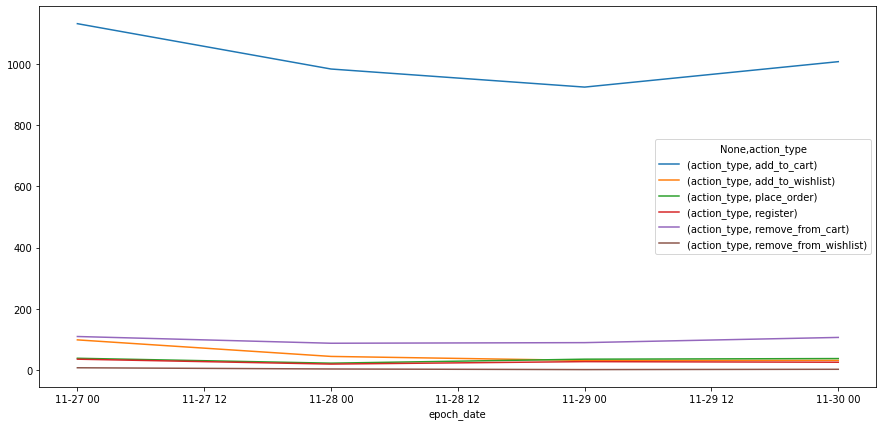

In [68]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
event_data[event_data.action_type != 'view'].sort_values(by='epoch_date').groupby(['epoch_date', 'action_type']).agg({'action_type': 'count'}).unstack().plot(ax=ax)